In [ ]:
!gdown 17dEDLI9Uiefgb7W4HxNWu5dhbpqvxP4P

Downloading...
From: https://drive.google.com/uc?id=17dEDLI9Uiefgb7W4HxNWu5dhbpqvxP4P
To: /content/dataset_.csv
100% 54.4k/54.4k [00:00<00:00, 46.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_.csv')
df.head()

,age,sex,bmi,children,smoker,region,medical charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df.head()


,age,sex,bmi,children,smoker,region,medical charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
# prompt: normalize the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()


,age,sex,bmi,children,smoker,region,medical charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled.iloc[:, 0:6]
y = df_scaled.iloc[:, 6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(6,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=500)


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0390
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089  
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0076
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0055
Epoch 13/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
Epoch 14/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 
Epoch 15/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063
Epoch 16/500

In [ ]:
# prompt: test it with some samples

# Assuming 'model' is already defined as in the preceding code

# Select some samples from X_test (or create new samples)
sample_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,22,33,55,44,88,99]  # Example indices
X_samples = X_test.iloc[sample_indices]

# Predict on the samples
predictions = model.predict(X_samples)

# Print the predictions
for i, prediction in enumerate(predictions):
  print(f"Sample {sample_indices[i]}: Predicted insurance cost = {prediction[0]:.2f} : real cost = {y_test.iloc[sample_indices[i]]}")


1/1 [==============================] - 0s 65ms/step
Sample 0: Predicted insurance cost = 0.14 : real cost = 0.12726860920046856
Sample 1: Predicted insurance cost = 0.06 : real cost = 0.06624736929622971
Sample 2: Predicted insurance cost = 0.45 : real cost = 0.4502755035729905
Sample 3: Predicted insurance cost = 0.13 : real cost = 0.13056996711587793
Sample 4: Predicted insurance cost = 0.42 : real cost = 0.5208167748406475
Sample 5: Predicted insurance cost = 0.07 : real cost = 0.05450062094018852
Sample 6: Predicted insurance cost = 0.01 : real cost = 0.015889671583675116
Sample 7: Predicted insurance cost = 0.21 : real cost = 0.20892201322026643
Sample 8: Predicted insurance cost = -0.01 : real cost = 0.04167296814888933
Sample 9: Predicted insurance cost = 0.13 : real cost = 0.1459342251370596
Sample 10: Predicted insurance cost = 0.23 : real cost = 0.2735472884164221
Sample 11: Predicted insurance cost = 0.10 : real cost = 0.09792483301734733
Sample 12: Predicted insurance cost 

In [ ]:
# Select some samples from X_test (or create new samples)
sample_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,22,33,55,44,88,99]  # Example indices
X_samples = X_test.iloc[sample_indices]

# Predict on the samples
predictions = model.predict(X_samples)

# Inverse transform to get the original scale
y_test_original = scaler.inverse_transform(np.concatenate((X_test.iloc[sample_indices], y_test.iloc[sample_indices].values.reshape(-1, 1)), axis=1))[:, -1]
predictions_original = scaler.inverse_transform(np.concatenate((X_test.iloc[sample_indices], predictions), axis=1))[:, -1]

# Print the predictions in the original scale
for i, prediction in enumerate(predictions_original):
  print(f"Sample {sample_indices[i]}: Predicted insurance cost = {prediction:.2f} : real cost = {y_test_original[i]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Sample 0: Predicted insurance cost = 9988.84 : real cost = 9095.07
Sample 1: Predicted insurance cost = 5231.29 : real cost = 5272.18
Sample 2: Predicted insurance cost = 25939.18 : real cost = 29330.98
Sample 3: Predicted insurance cost = 12834.15 : real cost = 9301.89
Sample 4: Predicted insurance cost = 28948.18 : real cost = 33750.29
Sample 5: Predicted insurance cost = 5531.63 : real cost = 4536.26
Sample 6: Predicted insurance cost = 6298.50 : real cost = 2117.34
Sample 7: Predicted insurance cost = 13347.37 : real cost = 14210.54
Sample 8: Predicted insurance cost = 3081.57 : real cost = 3732.63
Sample 9: Predicted insurance cost = 12196.84 : real cost = 10264.44
Sample 10: Predicted insurance cost = 19136.51 : real cost = 18259.22
Sample 11: Predicted insurance cost = 7995.46 : real cost = 7256.72
Sample 12: Predicted insurance cost = 5109.86 : real cost = 3947.41
Sample 22: Predicted insurance cost = 2107.90 : real cost = 1256.30
Sample 33

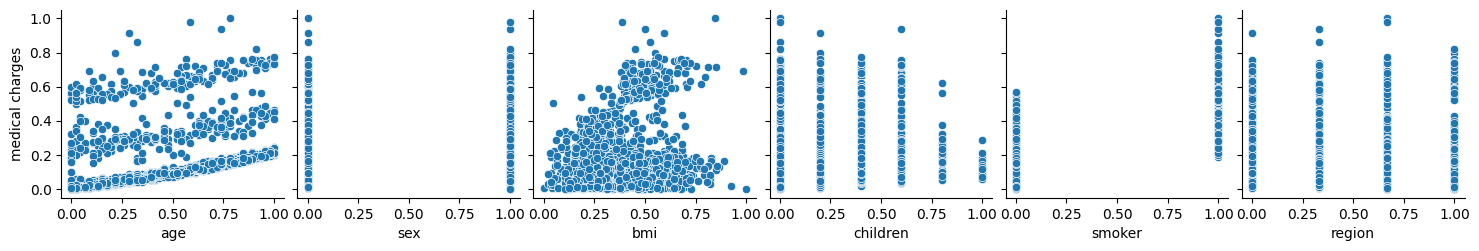

In [ ]:
# prompt: pair plot between every column and the y output

# Assuming 'df_scaled' is the DataFrame with scaled features and target

sns.pairplot(df_scaled, x_vars=df_scaled.columns[:-1], y_vars='medical charges', kind='scatter')
plt.show()


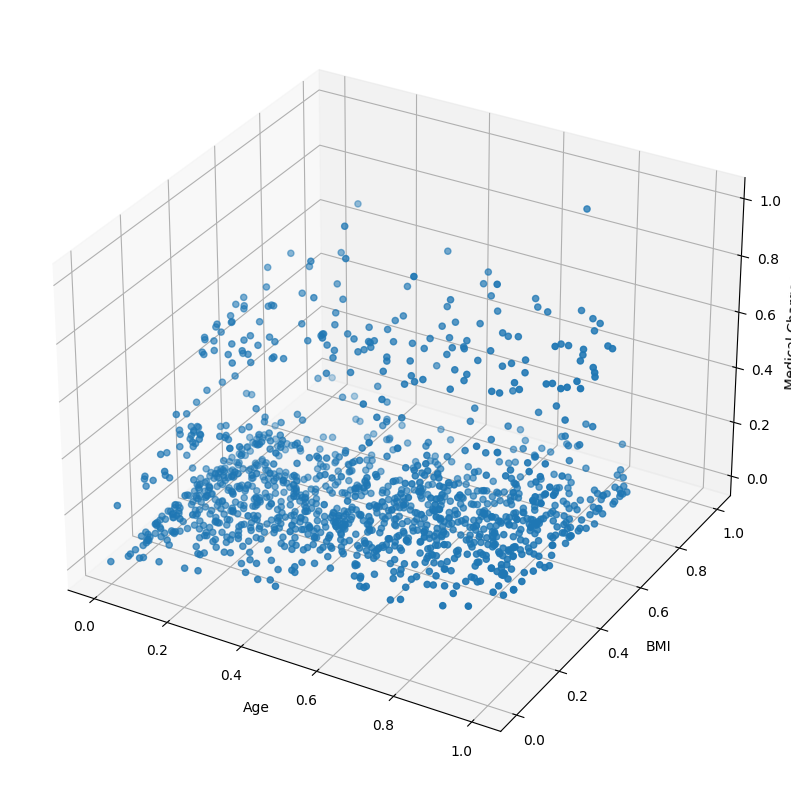

In [ ]:
# prompt: plot the age and bmi and the medical charges in 3rd plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_scaled['age'], df_scaled['bmi'], df_scaled['medical charges'])

ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Medical Charges')

plt.show()


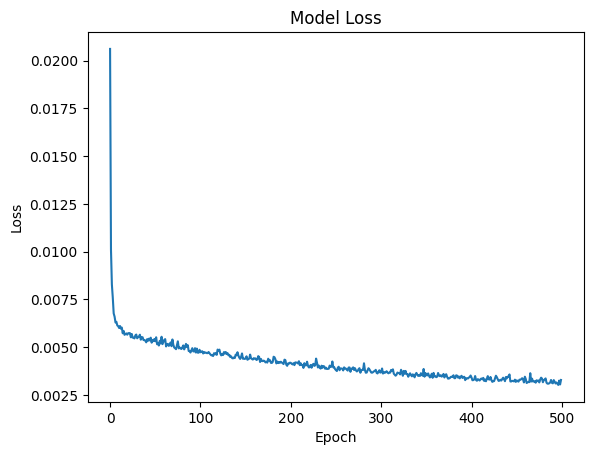

In [ ]:
# prompt: plot the loss

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


In [ ]:
# prompt: use the svm to predict and calculate the loss

from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Create an SVM regressor
svm_regressor = SVR(kernel='linear',C=1000)  # You can try different kernels like 'rbf', 'poly'

# Fit the model to the training data
svm_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.009367999880947202


In [ ]:
# prompt: use rbf to predict and calculate loss

# Create an SVM regressor with RBF kernel
svm_regressor_rbf = SVR(kernel='rbf', C=1000)  # You can adjust C for regularization

# Fit the model to the training data
svm_regressor_rbf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rbf = svm_regressor_rbf.predict(X_test)

# Calculate the mean squared error
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
print("Mean Squared Error (RBF Kernel):", mse_rbf)


Mean Squared Error (RBF Kernel): 0.011545227007292026


In [ ]:
# prompt: use linear regression

from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_regressor.predict(X_test)

# Calculate the mean squared error
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)


Mean Squared Error (Linear Regression): 0.00856982679944619


In [ ]:
# prompt: use ploynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features (degree 2 for example)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Linear Regression model
poly_regressor = LinearRegression()

# Fit the model to the polynomial features
poly_regressor.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_poly = poly_regressor.predict(X_test_poly)

# Calculate the mean squared error
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)


Mean Squared Error (Polynomial Regression): 0.005230939853587674
